In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/namrathan09/CODSOFT/main/IRIS.csv")

In [4]:
species = dataset['species'].value_counts().reset_index()
print(species)

             index  species
0      Iris-setosa       50
1  Iris-versicolor       50
2   Iris-virginica       50


In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


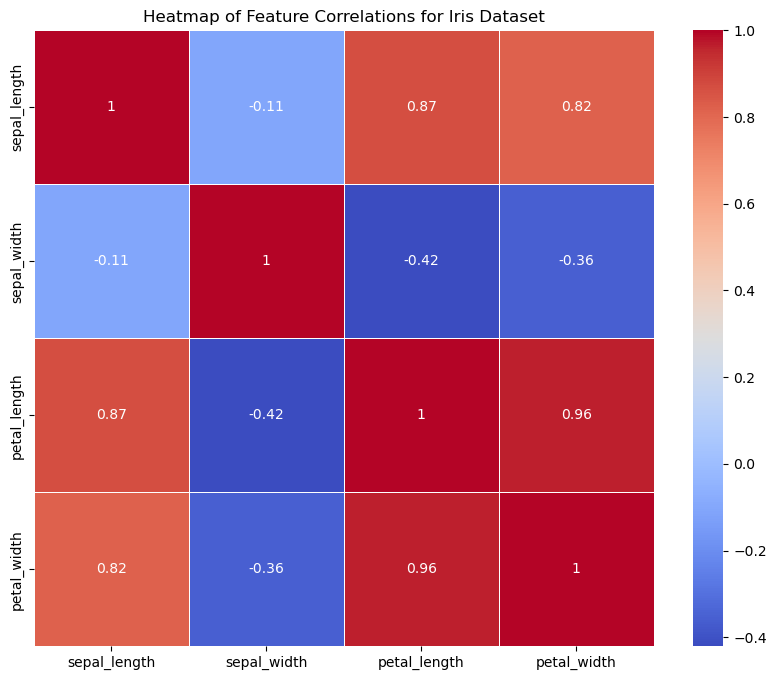

In [7]:
dataset_numeric = dataset.drop(columns=['species'])

correlation_matrix = dataset_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Feature Correlations for Iris Dataset')

plt.show()

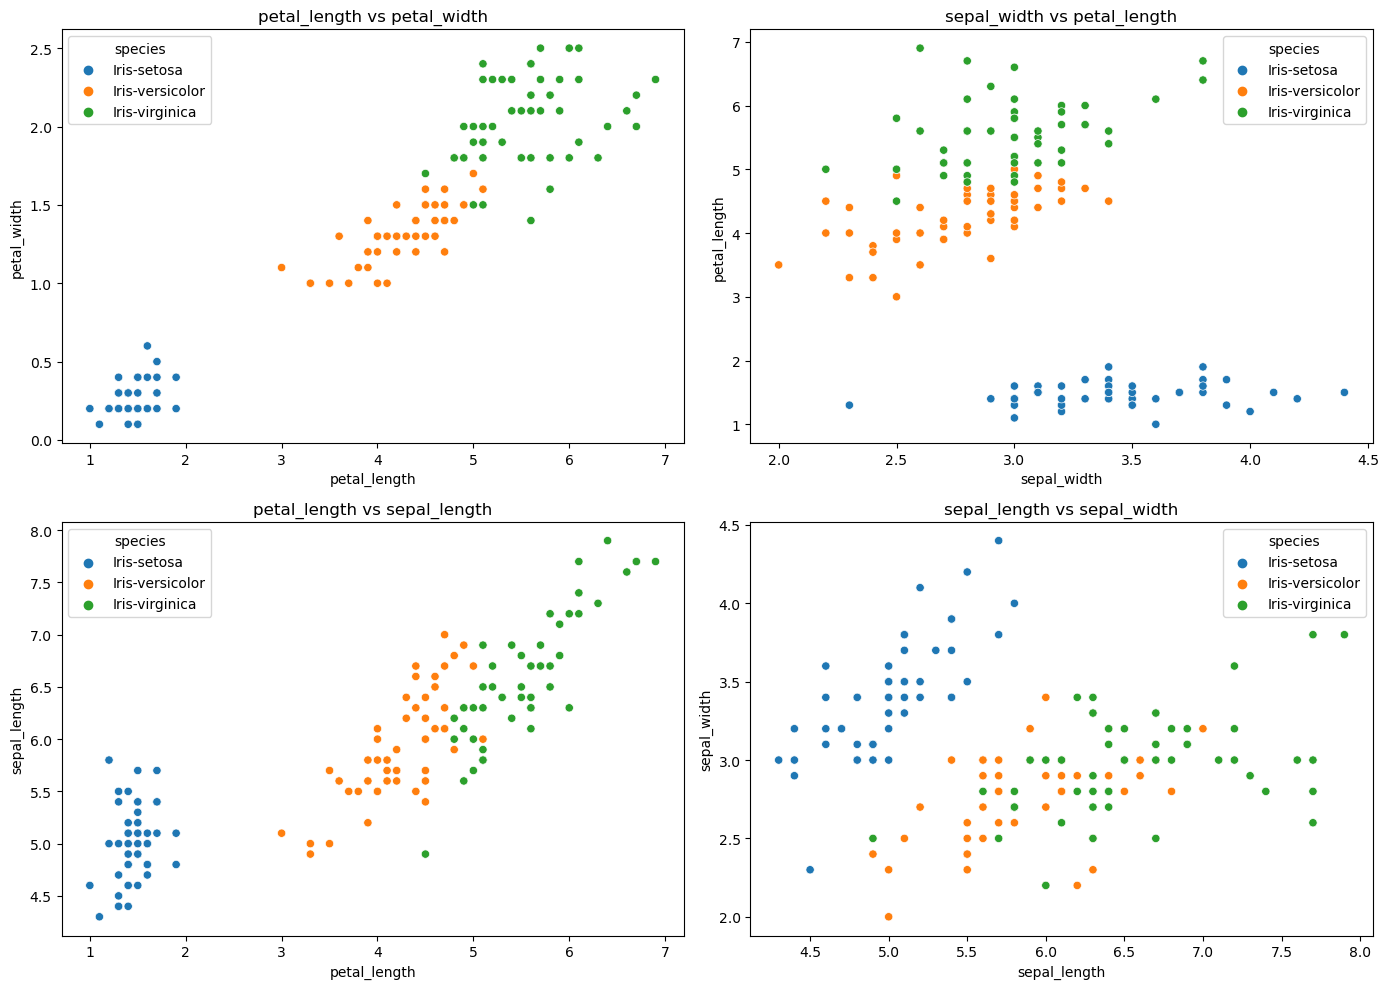

In [8]:
plt.figure(figsize=(14, 10))

#The highest positive correlation
plt.subplot(2, 2, 1)
sns.scatterplot(data=dataset, x='petal_length', y='petal_width', hue='species')
plt.title('petal_length vs petal_width')

#The lowest negative correlation
plt.subplot(2, 2, 2)
sns.scatterplot(data=dataset, x='sepal_width', y='petal_length', hue='species')
plt.title('sepal_width vs petal_length')

plt.subplot(2, 2, 3)
sns.scatterplot(data=dataset, x='petal_length', y='sepal_length', hue='species')
plt.title('petal_length vs sepal_length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=dataset, x='sepal_length', y='sepal_width', hue='species')
plt.title('sepal_length vs sepal_width')

plt.tight_layout()
plt.show()

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return cm, accuracy

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [19]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

In [20]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

In [22]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [23]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

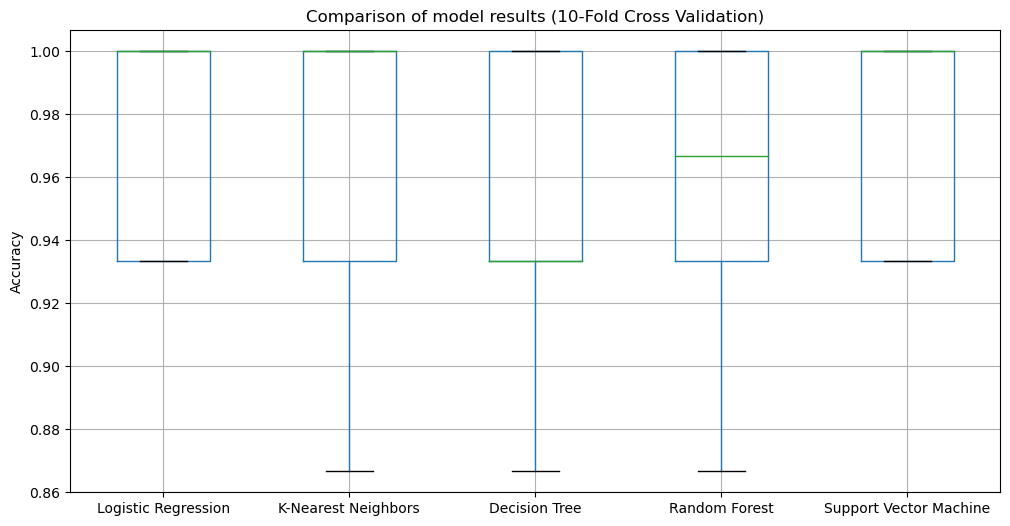

Logistic Regression       0.973333
K-Nearest Neighbors       0.966667
Decision Tree             0.953333
Random Forest             0.960000
Support Vector Machine    0.973333
dtype: float64

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    results[model_name] = cv_scores

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
results_df.boxplot()
plt.title('Comparison of model results (10-Fold Cross Validation)')
plt.ylabel('Accuracy')
plt.show()

results_df.mean()